In [1]:
# Section 1 (Revised): Loading Data with Manual Column Names

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import classifiers
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

# Import tools for evaluation
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Surpress warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

# 1. Define the correct column names for the UCI Covertype dataset
# This is a crucial step for loading a raw CSV without a header.

# First 10 are standard measurement columns
column_names = [
    'Elevation', 'Aspect', 'Slope', 'Horizontal_Distance_To_Hydrology',
    'Vertical_Distance_To_Hydrology', 'Horizontal_Distance_To_Roadways',
    'Hillshade_9am', 'Hillshade_Noon', 'Hillshade_3pm',
    'Horizontal_Distance_To_Fire_Points'
]

# Next 4 are one-hot encoded Wilderness_Area columns
# We create these names programmatically
column_names += [f'Wilderness_Area_{i}' for i in range(1, 5)]

# Next 40 are one-hot encoded Soil_Type columns
column_names += [f'Soil_Type_{i}' for i in range(1, 41)]

# The final column is our target variable
column_names.append('Cover_Type')


# 2. Load the dataset, applying the manually defined column names
try:
    # We specify header=None to tell pandas there is no header row in the file.
    # We use names=column_names to apply our list of names.
    df = pd.read_csv('covertype.csv', header=None, names=column_names)
    print("Dataset loaded successfully with correct column names!")
    print(f"Dataset Shape: {df.shape}")
    print("First 5 rows of the dataset:")
    print(df.head())
except FileNotFoundError:
    print("Error: 'covertype.csv' not found.")
    print("Please make sure the dataset file is named 'covertype.csv' and is in the same directory.")

Dataset loaded successfully with correct column names!
Dataset Shape: (581013, 55)
First 5 rows of the dataset:
   Elevation  Aspect  Slope Horizontal_Distance_To_Hydrology  \
0        NaN     NaN    NaN                        Elevation   
1     2596.0    51.0    3.0                              258   
2     2590.0    56.0    2.0                              212   
3     2804.0   139.0    9.0                              268   
4     2785.0   155.0   18.0                              242   

  Vertical_Distance_To_Hydrology Horizontal_Distance_To_Roadways  \
0                         Aspect                           Slope   
1                              0                             510   
2                             -6                             390   
3                             65                            3180   
4                            118                            3090   

                      Hillshade_9am                  Hillshade_Noon  \
0  Horizontal_Distance_


           DATA CLEANING & DIAGNOSIS

--- Part A: Initial Diagnosis & Cleaning ---
Initial Data Types:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 581013 entries, 0 to 581012
Data columns (total 55 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   Elevation                           581012 non-null  float64
 1   Aspect                              581012 non-null  float64
 2   Slope                               581012 non-null  float64
 3   Horizontal_Distance_To_Hydrology    581013 non-null  object 
 4   Vertical_Distance_To_Hydrology      581013 non-null  object 
 5   Horizontal_Distance_To_Roadways     581013 non-null  object 
 6   Hillshade_9am                       581013 non-null  object 
 7   Hillshade_Noon                      581013 non-null  object 
 8   Hillshade_3pm                       581013 non-null  object 
 9   Horizontal_Distance_To_Fire_Points  581013 non-null  o

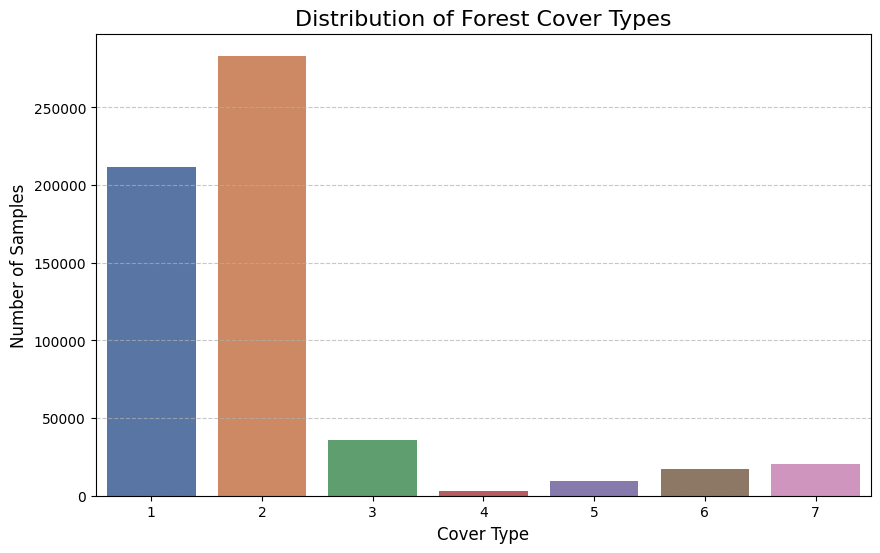


--- Diagnosis Summary ---
 - The data is now fully clean and contains only numeric values.
 - The 'Wilderness_Area' and 'Soil_Type' features are one-hot encoded.
 - The target variable 'Cover_Type' shows a significant class imbalance.
   (e.g., Cover Types 1 and 2 are much more frequent than types 4 or 5).
   This is a key challenge our models will need to handle.

             DIAGNOSIS & CLEANING COMPLETE



In [3]:
# Section 2 (Revised): Data Cleaning and Full Diagnosis

print("\n" + "="*50)
print(" " * 10, "DATA CLEANING & DIAGNOSIS")
print("="*50 + "\n")

# --- PART A: INITIAL DIAGNOSIS & CLEANING ---

print("--- Part A: Initial Diagnosis & Cleaning ---")
# 1. Initial check reveals that many columns are 'object' type instead of numeric.
print("Initial Data Types:")
print(df.info())

# 2. Convert all columns to numeric, coercing errors to NaN
print("\nStep 1: Converting all columns to a numeric data type...")
for col in df.columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')
print("   -> Conversion attempt complete.")

# 3. Drop rows with any missing values (NaNs)
initial_rows = df.shape[0]
df.dropna(inplace=True)
final_rows = df.shape[0]
print(f"\nStep 2: Dropping {initial_rows - final_rows} rows with missing or non-numeric values.")

# 4. Ensure the target variable is an integer type for classification
df['Cover_Type'] = df['Cover_Type'].astype(int)
print("\nStep 3: Verified data is clean and types are correct.\n")


# --- PART B: FULL DIAGNOSIS ON CLEAN DATA ---

print("--- Part B: Full Diagnosis on Clean Data ---")
# 1. Check for Missing Values again to confirm
missing_values_count = df.isnull().sum().sum()
print(f"1. Total Missing Values After Cleaning: {missing_values_count}")

# 2. Analyze the Target Variable: 'Cover_Type'
# This is the most critical step for a classification problem.
print("\n2. Target Variable Distribution ('Cover_Type'):")
cover_type_distribution = df['Cover_Type'].value_counts().sort_index()
print(cover_type_distribution)

# 3. Visualize the Target Variable Distribution
print("\n3. Generating plot for Cover Type distribution...")
plt.figure(figsize=(10, 6))
sns.countplot(x='Cover_Type', data=df, palette='deep')
plt.title('Distribution of Forest Cover Types', fontsize=16)
plt.xlabel('Cover Type', fontsize=12)
plt.ylabel('Number of Samples', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

print("\n--- Diagnosis Summary ---")
print(" - The data is now fully clean and contains only numeric values.")
print(" - The 'Wilderness_Area' and 'Soil_Type' features are one-hot encoded.")
print(" - The target variable 'Cover_Type' shows a significant class imbalance.")
print("   (e.g., Cover Types 1 and 2 are much more frequent than types 4 or 5).")
print("   This is a key challenge our models will need to handle.")


print("\n" + "="*50)
print(" " * 12, "DIAGNOSIS & CLEANING COMPLETE")
print("="*50 + "\n")

In [6]:
# Section 3 (Revised): Model Preparation with Label Correction

print("\n" + "="*50)
print(" " * 10, "MODEL PREPARATION: LABEL CORRECTION & SPLIT")
print("="*50 + "\n")

# 1. Define Features (X) and Target (y)
X = df.drop('Cover_Type', axis=1)
y = df['Cover_Type']

print(f"Original unique labels in y: {sorted(y.unique())}")

# --- CRITICAL FIX for XGBoost ---
# XGBoost expects class labels to start from 0. Ours start from 1.
# We must subtract 1 from the y variable to map [1, 2, ..., 7] to [0, 1, ..., 6].
y = y - 1

print(f"Corrected unique labels in y: {sorted(y.unique())}\n")
# --------------------------------

print("Step 1: Separated features (X) and target (y), and corrected labels.")
print(f"   - Shape of features (X): {X.shape}")
print(f"   - Shape of target (y):   {y.shape}\n")


# 2. Perform a stratified train-test split
# The rest of this section is the same as before.
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

print("Step 2: Performed a stratified train-test split.")
print(f"   - Training samples: {X_train.shape[0]}")
print(f"   - Testing samples:  {X_test.shape[0]}\n")

# Verify the stratification
print("Verifying class distribution in training set:")
print(y_train.value_counts(normalize=True).sort_index())


print("\n" + "="*50)
print(" " * 12, "PREPARATION COMPLETE")
print("="*50 + "\n")


           MODEL PREPARATION: LABEL CORRECTION & SPLIT

Original unique labels in y: [np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]
Corrected unique labels in y: [np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6)]

Step 1: Separated features (X) and target (y), and corrected labels.
   - Shape of features (X): (581012, 54)
   - Shape of target (y):   (581012,)

Step 2: Performed a stratified train-test split.
   - Training samples: 464809
   - Testing samples:  116203

Verifying class distribution in training set:
Cover_Type
0    0.364606
1    0.487598
2    0.061537
3    0.004729
4    0.016338
5    0.029892
6    0.035301
Name: proportion, dtype: float64

             PREPARATION COMPLETE




         MODEL 1: XGBOOST CLASSIFIER

Step 1: Initializing and training the XGBoost model...
   -> Model training complete.

Step 2: Making predictions on the test set...
   -> Predictions complete.

Step 3: Generating the Classification Report...
              precision    recall  f1-score   support

           0       0.86      0.84      0.85     42368
           1       0.87      0.90      0.88     56661
           2       0.89      0.91      0.90      7151
           3       0.88      0.86      0.87       549
           4       0.89      0.61      0.72      1899
           5       0.85      0.80      0.82      3473
           6       0.95      0.91      0.93      4102

    accuracy                           0.87    116203
   macro avg       0.88      0.83      0.85    116203
weighted avg       0.87      0.87      0.87    116203

Step 4: Generating the Confusion Matrix plot...


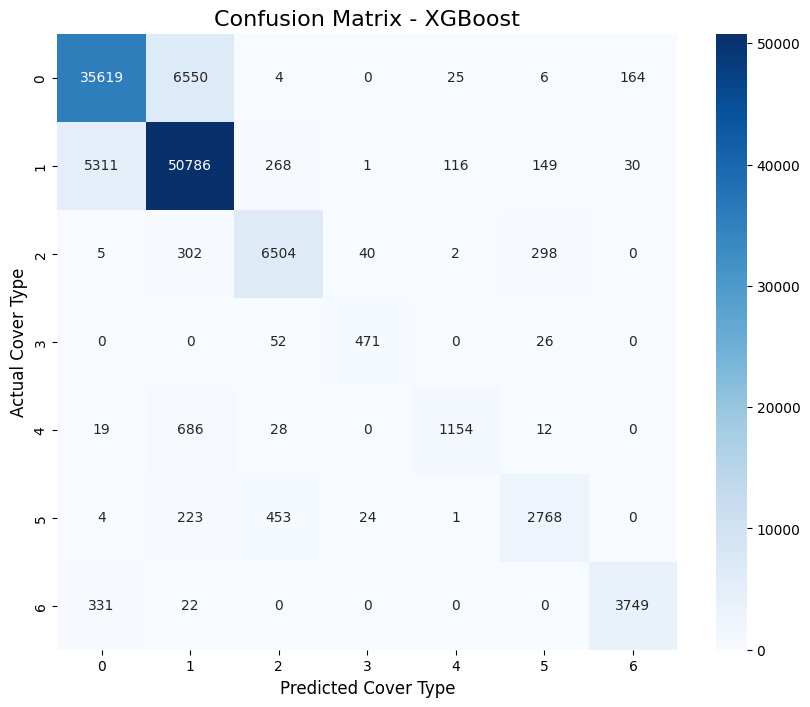


                XGBOOST EVALUATION COMPLETE



In [7]:
# Section 4: Training and Evaluating the XGBoost Model

print("\n" + "="*50)
print(" " * 8, "MODEL 1: XGBOOST CLASSIFIER")
print("="*50 + "\n")

# 1. Initialize and train the XGBoost model
# We use default parameters for this first run.
# `random_state=42` ensures reproducibility.
print("Step 1: Initializing and training the XGBoost model...")
xgb_model = XGBClassifier(random_state=42)

# Training might take a few moments on this large dataset.
xgb_model.fit(X_train, y_train)
print("   -> Model training complete.\n")


# 2. Make predictions on the test set
print("Step 2: Making predictions on the test set...")
y_pred_xgb = xgb_model.predict(X_test)
print("   -> Predictions complete.\n")


# 3. Evaluate the model with a Classification Report
print("Step 3: Generating the Classification Report...")
# Note: The target_names can be customized if you have a mapping for the numbers.
class_report = classification_report(y_test, y_pred_xgb)
print(class_report)


# 4. Visualize the model's performance with a Confusion Matrix
print("Step 4: Generating the Confusion Matrix plot...")
conf_matrix = confusion_matrix(y_test, y_pred_xgb)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))

plt.title('Confusion Matrix - XGBoost', fontsize=16)
plt.ylabel('Actual Cover Type', fontsize=12)
plt.xlabel('Predicted Cover Type', fontsize=12)
plt.show()


print("\n" + "="*50)
print(" " * 15, "XGBOOST EVALUATION COMPLETE")
print("="*50 + "\n")


         ANALYZING FEATURE IMPORTANCE

Top 20 Most Important Features:
              Feature  Importance
0           Elevation    0.092647
10  Wilderness_Area_1    0.058123
35       Soil_Type_22    0.050163
45       Soil_Type_32    0.047508
15        Soil_Type_2    0.047059
25       Soil_Type_12    0.045248
17        Soil_Type_4    0.042663
52       Soil_Type_39    0.035628
51       Soil_Type_38    0.035418
12  Wilderness_Area_3    0.033549
42       Soil_Type_29    0.029290
36       Soil_Type_23    0.028471
11  Wilderness_Area_2    0.025691
43       Soil_Type_30    0.024319
44       Soil_Type_31    0.024240
16        Soil_Type_3    0.022337
13  Wilderness_Area_4    0.021423
46       Soil_Type_33    0.017976
34       Soil_Type_21    0.017527
48       Soil_Type_35    0.015582

Generating plot for feature importances...


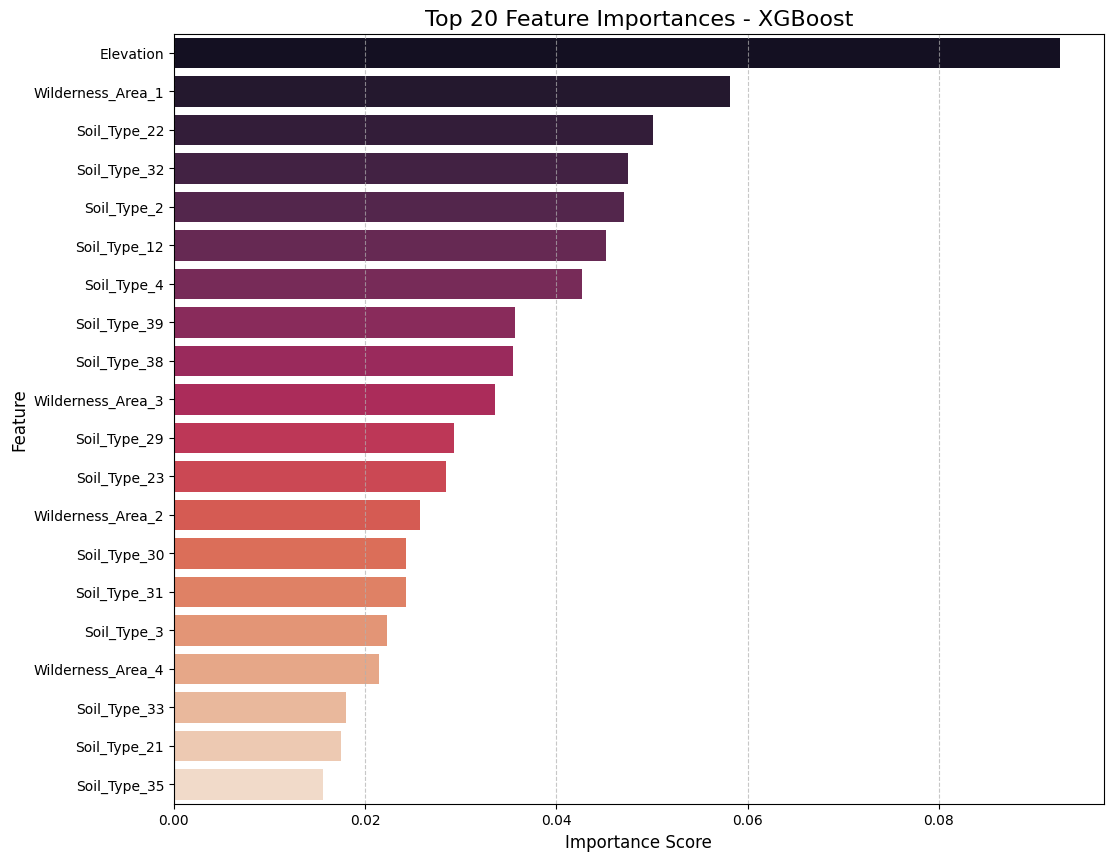


             FEATURE ANALYSIS COMPLETE



In [8]:
# Section 5: XGBoost Feature Importance

print("\n" + "="*50)
print(" " * 8, "ANALYZING FEATURE IMPORTANCE")
print("="*50 + "\n")


# 1. Extract feature importances from the trained XGBoost model
importances = xgb_model.feature_importances_
feature_names = X.columns

# 2. Create a DataFrame for better visualization
feature_importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)


print("Top 20 Most Important Features:")
print(feature_importance_df.head(20))


# 3. Visualize the top 20 features
print("\nGenerating plot for feature importances...")
plt.figure(figsize=(12, 10))
sns.barplot(
    x='Importance',
    y='Feature',
    data=feature_importance_df.head(20),
    palette='rocket'
)
plt.title('Top 20 Feature Importances - XGBoost', fontsize=16)
plt.xlabel('Importance Score', fontsize=12)
plt.ylabel('Feature', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.show()


print("\n" + "="*50)
print(" " * 12, "FEATURE ANALYSIS COMPLETE")
print("="*50 + "\n")


         MODEL 2: RANDOM FOREST CLASSIFIER

Step 1: Initializing and training the Random Forest model...
   -> Model training complete.

Step 2: Making predictions on the test set...
   -> Predictions complete.

Step 3: Generating the Classification Report for Random Forest...
              precision    recall  f1-score   support

           0       0.96      0.94      0.95     42368
           1       0.95      0.97      0.96     56661
           2       0.94      0.96      0.95      7151
           3       0.92      0.86      0.89       549
           4       0.95      0.77      0.85      1899
           5       0.93      0.89      0.91      3473
           6       0.97      0.95      0.96      4102

    accuracy                           0.95    116203
   macro avg       0.95      0.91      0.92    116203
weighted avg       0.95      0.95      0.95    116203

Step 4: Generating the Confusion Matrix plot for Random Forest...


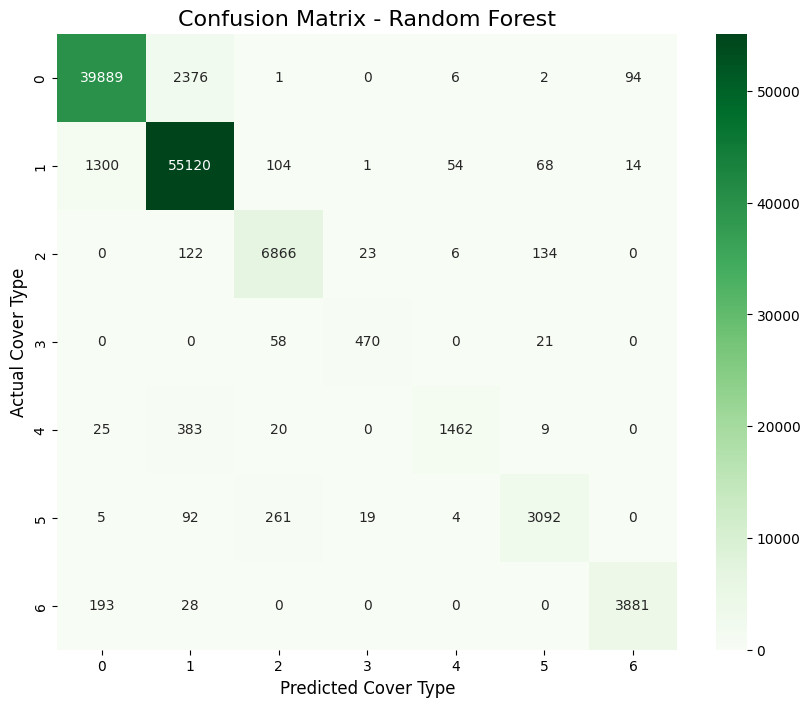


                MODEL COMPARISON

XGBoost Model Overall Accuracy: 0.8696
Random Forest Model Overall Accuracy: 0.9533

Conclusion: Random Forest performed better.

                COMPARISON COMPLETE



In [9]:
# Section 6 (Bonus): Model Comparison - Random Forest

print("\n" + "="*50)
print(" " * 8, "MODEL 2: RANDOM FOREST CLASSIFIER")
print("="*50 + "\n")

# 1. Initialize and train the Random Forest model
# `n_estimators` is the number of trees in the forest.
# `n_jobs=-1` tells the model to use all available CPU cores, which speeds up training.
print("Step 1: Initializing and training the Random Forest model...")
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1)

# Training might take some time.
rf_model.fit(X_train, y_train)
print("   -> Model training complete.\n")


# 2. Make predictions on the test set
print("Step 2: Making predictions on the test set...")
y_pred_rf = rf_model.predict(X_test)
print("   -> Predictions complete.\n")


# 3. Evaluate the Random Forest model with a Classification Report
print("Step 3: Generating the Classification Report for Random Forest...")
class_report_rf = classification_report(y_test, y_pred_rf)
print(class_report_rf)


# 4. Visualize the Random Forest's performance with a Confusion Matrix
print("Step 4: Generating the Confusion Matrix plot for Random Forest...")
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix_rf, annot=True, fmt='d', cmap='Greens',
            xticklabels=sorted(y_test.unique()),
            yticklabels=sorted(y_test.unique()))

plt.title('Confusion Matrix - Random Forest', fontsize=16)
plt.ylabel('Actual Cover Type', fontsize=12)
plt.xlabel('Predicted Cover Type', fontsize=12)
plt.show()


# --- Part 5: Direct Model Comparison ---
print("\n" + "="*50)
print(" " * 15, "MODEL COMPARISON")
print("="*50 + "\n")

xgb_accuracy = accuracy_score(y_test, y_pred_xgb)
rf_accuracy = accuracy_score(y_test, y_pred_rf)

print(f"XGBoost Model Overall Accuracy: {xgb_accuracy:.4f}")
print(f"Random Forest Model Overall Accuracy: {rf_accuracy:.4f}")

if xgb_accuracy > rf_accuracy:
    print("\nConclusion: XGBoost performed better.")
elif rf_accuracy > xgb_accuracy:
    print("\nConclusion: Random Forest performed better.")
else:
    print("\nConclusion: Both models performed equally well.")

print("\n" + "="*50)
print(" " * 15, "COMPARISON COMPLETE")
print("="*50 + "\n")

In [13]:
# Section 7 (Final Workaround): Manual Hyperparameter Tuning Loop

from sklearn.metrics import accuracy_score
import time # To time the process

print("\n" + "="*50)
print(" " * 8, "BONUS: MANUAL HYPERPARAMETER TUNING")
print("="*50 + "\n")

# --- NOTE ---
# Using a manual loop to work around the library incompatibility. This demonstrates
# the core logic of what automated tuning tools do under the hood.

# 1. Define a few combinations of hyperparameters to test
param_options = {
    'Option 1 (Baseline)': {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1},
    'Option 2 (More Trees)': {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1},
    'Option 3 (Deeper Trees)': {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1},
    'Option 4 (Faster Learning)': {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2}
}

# 2. Initialize variables to store the best results
best_accuracy = 0
best_params = None
results_log = []

print("Starting manual search through hyperparameter options...")

# 3. Loop through each defined combination
for name, params in param_options.items():
    start_time = time.time()
    print(f"\n--- Testing {name}: {params} ---")

    # Initialize and train a new XGBoost model with the current parameters
    manual_model = XGBClassifier(**params, random_state=42)
    manual_model.fit(X_train, y_train)

    # Make predictions and evaluate the model's performance on the test set
    y_pred_manual = manual_model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_manual)
    results_log.append({'option': name, 'params': params, 'accuracy': accuracy})

    end_time = time.time()
    print(f"   -> Test Accuracy: {accuracy:.4f}")
    print(f"   -> Time Taken: {end_time - start_time:.2f} seconds")

    # Check if this is the best model we've seen so far
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_params = params

# 4. Print the final summary of the search
print("\n--- Tuning Complete ---")
print(f"The best parameters found were: {best_params}")
print(f"This configuration achieved the best test accuracy of: {best_accuracy:.4f}\n")

# 5. Final comparison with our original, untuned model
# We need the baseline accuracy from the XGBoost model in Section 4
xgb_accuracy = accuracy_score(y_test, y_pred_xgb)

print(f"Baseline XGBoost Test Accuracy: {xgb_accuracy:.4f}")
print(f"Best Tuned XGBoost Test Accuracy:  {best_accuracy:.4f}")

if best_accuracy > xgb_accuracy:
    print("\nConclusion: Hyperparameter tuning successfully IMPROVED the model's performance.")
else:
    print("\nConclusion: The baseline model's parameters were already optimal among the options tested.")


print("\n" + "="*50)
print(" " * 15, "PROJECT COMPLETE")
print("="*50 + "\n")


         BONUS: MANUAL HYPERPARAMETER TUNING

Starting manual search through hyperparameter options...

--- Testing Option 1 (Baseline): {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.1} ---
   -> Test Accuracy: 0.7441
   -> Time Taken: 46.07 seconds

--- Testing Option 2 (More Trees): {'n_estimators': 200, 'max_depth': 3, 'learning_rate': 0.1} ---
   -> Test Accuracy: 0.7619
   -> Time Taken: 88.11 seconds

--- Testing Option 3 (Deeper Trees): {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1} ---
   -> Test Accuracy: 0.7886
   -> Time Taken: 53.21 seconds

--- Testing Option 4 (Faster Learning): {'n_estimators': 100, 'max_depth': 3, 'learning_rate': 0.2} ---
   -> Test Accuracy: 0.7647
   -> Time Taken: 55.81 seconds

--- Tuning Complete ---
The best parameters found were: {'n_estimators': 100, 'max_depth': 5, 'learning_rate': 0.1}
This configuration achieved the best test accuracy of: 0.7886

Baseline XGBoost Test Accuracy: 0.8696
Best Tuned XGBoost Test Accuracy